# Introduction

## The Problem:

The bank recently experienced a decline in the number of subcriptions for their [term deposit](https://www.investopedia.com/terms/t/termdeposit.asp). They have come up with ads for their existing clients to address this and would like to do a targeted marketing approach. They would like to predict which of their clients have a higher chance to subscribe for a term deposit.

## Objective: 
- To understand what factors contributed most to term deposit subscription.

- To perform clustering to find any meaningful patterns of employee traits.

- To create a model that predicts the likelihood if a certain client will subscribe for a term deposit or not. 

- To create or improve different marketing strategies for clients that are least likely to subscribe for a term deposit.


The implementation of this model will allow the bank to create better marketing strategies.

## Categories of Analytics covered:
1. Descriptive Analytics - What happened?
2. Predictive Analytics - What might happen?
3. Prescriptive Analytics - What should we do?

### Import Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Load Data

In [2]:
full_dataset = pd.read_csv('data/bank.csv')

In [3]:
full_dataset.head()

age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes

### Data Quality Check

In [4]:
# check for missing values
full_dataset.isnull().any()

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
deposit      False
dtype: bool

### Input variables:
#### Client data:
1 - age (numeric) <br>
2 - job : type of job (categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self employed', 'services', 'student', 'technician', 'unemployed', 'unknown') <br>
3 - marital : marital status (categorical: 'divorced', 'married', 'single', 'unknown'; note: 'divorced' means divorced or widowed) <br>
4 - education (categorical: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown') <br>
5 - default: has credit in default? (categorical: 'no', 'yes', 'unknown') <br>
6 - balance: average yearly balance (numeric) <br>
7 - housing: has housing loan? (categorical: 'no', 'yes', 'unknown') <br>
8 - loan: has personal loan? (categorical: 'no', 'yes', 'unknown') <br>

#### Campaign data:
9 - contact: contact communication type (categorical: 'cellular','telephone') <br>
10 - day: last contact day of month (numeric) <br>
11 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec') <br>
12 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model. <br>
13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact) <br>
14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; -1 means client was not previously contacted) <br>
15 - previous: number of contacts performed before this campaign and for this client (numeric) <br>
16 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success') <br>


#### Output variable (desired target):
17 - deposit: has the client subscribed a term deposit? (binary: 'yes','no')

In [5]:
# rename columns
full_dataset = full_dataset.rename( columns = { 'contact' : 'contact_mode', 
                                              'campaign' : 'current_contacts',
                                              'pdays' : 'previous_days',
                                              'previous' : 'previous_contacts',
                                              'poutcome' : 'previous_outcome'})

In [6]:
# change values of deposit to 0 (did not subscribe) and 1 (subscribed)

new_dict = {'yes' : 1, 'no' : 0}

full_dataset = full_dataset.replace({'deposit' : new_dict})

In [7]:
full_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                11162 non-null  int64 
 1   job                11162 non-null  object
 2   marital            11162 non-null  object
 3   education          11162 non-null  object
 4   default            11162 non-null  object
 5   balance            11162 non-null  int64 
 6   housing            11162 non-null  object
 7   loan               11162 non-null  object
 8   contact_mode       11162 non-null  object
 9   day                11162 non-null  int64 
 10  month              11162 non-null  object
 11  duration           11162 non-null  int64 
 12  current_contacts   11162 non-null  int64 
 13  previous_days      11162 non-null  int64 
 14  previous_contacts  11162 non-null  int64 
 15  previous_outcome   11162 non-null  object
 16  deposit            11162 non-null  int64

In [8]:
# subcription rate
subscription_rate = full_dataset.deposit.value_counts() / 11162
subscription_rate

0    0.52616
1    0.47384
Name: deposit, dtype: float64

In [9]:
# descriptive stats for numerical columns
full_dataset.describe()

age       balance           day      duration  \
count  11162.000000  11162.000000  11162.000000  11162.000000   
mean      41.231948   1528.538524     15.658036    371.993818   
std       11.913369   3225.413326      8.420740    347.128386   
min       18.000000  -6847.000000      1.000000      2.000000   
25%       32.000000    122.000000      8.000000    138.000000   
50%       39.000000    550.000000     15.000000    255.000000   
75%       49.000000   1708.000000     22.000000    496.000000   
max       95.000000  81204.000000     31.000000   3881.000000   

       current_contacts  previous_days  previous_contacts       deposit  
count      11162.000000   11162.000000       11162.000000  11162.000000  
mean           2.508421      51.330407           0.832557      0.473840  
std            2.722077     108.758282           2.292007      0.499338  
min            1.000000      -1.000000           0.000000      0.000000  
25%            1.000000      -1.000000           0.000000      0.000000  
50%            2.000000      -1.000000           0.000000      0.000000  
75%            3.000000      20.750000           1.000000      1.000000  
max           63.000000     854.000000          58.000000      1.000000

In [10]:
subscription_summary = full_dataset.groupby('deposit')
subscription_summary.mean()

age      balance        day    duration  current_contacts  \
deposit                                                                    
0        40.837391  1280.227141  16.108122  223.130257          2.839264   
1        41.670070  1804.267915  15.158253  537.294574          2.141047   

         previous_days  previous_contacts  
deposit                                    
0            35.685340           0.528350  
1            68.702968           1.170354

In [11]:
subscription_summary.std()

age      balance       day    duration  current_contacts  \
deposit                                                                   
0        10.264815  2933.411934  8.322071  208.577530          3.244474   
1        13.497781  3501.104777  8.501875  392.525262          1.921826   

         previous_days  previous_contacts  
deposit                                    
0            96.182893           1.979610  
1           118.822266           2.553272

#### Observation
There is an indicator that the duration of last contact, the number of days since the last contact and the number of previous contacts as they have the largest relative diffrence in terms of subscription outcome.

age   balance       day  duration  current_contacts  \
age                1.000000  0.112300 -0.000762  0.000189         -0.005278   
balance            0.112300  1.000000  0.010467  0.022436         -0.013894   
day               -0.000762  0.010467  1.000000 -0.018511          0.137007   
duration           0.000189  0.022436 -0.018511  1.000000         -0.041557   
current_contacts  -0.005278 -0.013894  0.137007 -0.041557          1.000000   
previous_days      0.002774  0.017411 -0.077232 -0.027392         -0.102726   
previous_contacts  0.020169  0.030805 -0.058981 -0.026716         -0.049699   
deposit            0.034901  0.081129 -0.056326  0.451919         -0.128081   

                   previous_days  previous_contacts   deposit  
age                     0.002774           0.020169  0.034901  
balance                 0.017411           0.030805  0.081129  
day                    -0.077232          -0.058981 -0.056326  
duration               -0.027392          -0.026716  0.451919  
current_contacts       -0.102726          -0.049699 -0.128081  
previous_days           1.000000           0.507272  0.151593  
previous_contacts       0.507272           1.000000  0.139867  
deposit                 0.151593           0.139867  1.000000

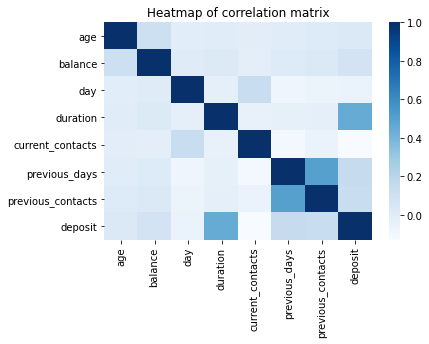

In [12]:
# correlation matrix
corr = full_dataset.corr()
sns.heatmap(corr, 
           xticklabels = corr.columns.values,
           yticklabels = corr.columns.values,
           cmap = 'Blues')

plt.title('Heatmap of correlation matrix')

corr

### Create a Test Set

In [13]:
from sklearn.model_selection import train_test_split

features = full_dataset.iloc[:,0:-1]
target = full_dataset.iloc[:,-1]

features_train, features_test, target_train, target_test = train_test_split(features, 
                                                                            target, 
                                                                            test_size=0.20, 
                                                                            random_state=123, 
                                                                            stratify = target)

In [16]:
print(features_train.shape)
print(features_test.shape)

(8929, 16)
(2233, 16)


In [26]:
train_set = pd.concat([features_train, target_train], axis = 1)

In [27]:
print(train_set.shape)
train_set.head()

(8929, 17)


age            job  marital  education default  balance housing loan  \
6270    42     management  married   tertiary      no     -671      no   no   
10963   39      housemaid   single    primary      no      109     yes   no   
9909    43  self-employed  married  secondary      no      918     yes   no   
2143    25        student   single  secondary      no      304      no   no   
4869    73        retired  married   tertiary      no      448      no   no   

      contact_mode  day month  duration  current_contacts  previous_days  \
6270      cellular   28   aug        80                 2             -1   
10963      unknown    6   may       699                 3             -1   
9909       unknown    6   may       193                 1             -1   
2143      cellular   26   may       226                 2             -1   
4869      cellular   24   mar       136                 1             -1   

       previous_contacts previous_outcome  deposit  
6270                   0          unknown        0  
10963                  0          unknown        0  
9909                   0          unknown        0  
2143                   0          unknown        1  
4869                   0          unknown        1

In [29]:
# subcription rate
subscription_rate = train_set['deposit'].value_counts() / 8929
subscription_rate

0    0.526151
1    0.473849
Name: deposit, dtype: float64

### Exploratory Data Analysis

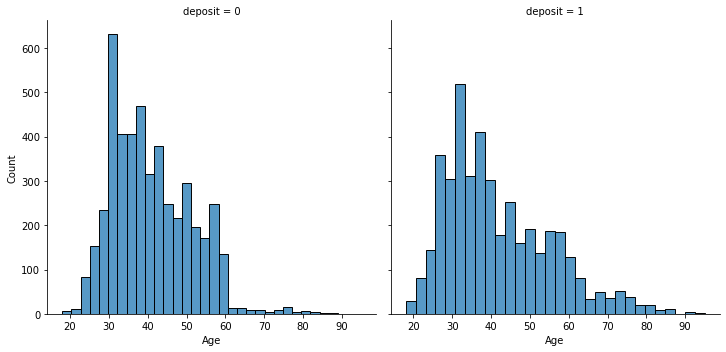

In [30]:
# visualise distribution of age

age_plot = sns.FacetGrid(train_set, col = 'deposit', height = 5)
age_plot.map(sns.histplot, 'age', bins = 30)
age_plot.set_axis_labels('Age', 'Count')

#### Clients above 60 years old tend to subscribe for a term deposit.

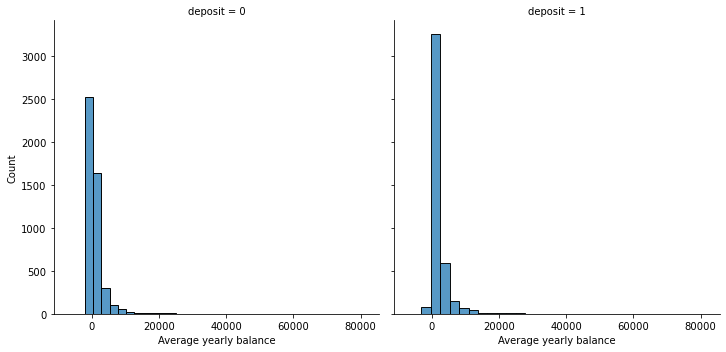

In [31]:
# visualise distribution of balance

balance_plot = sns.FacetGrid(train_set, col = 'deposit', height = 5)
balance_plot.map(sns.histplot, 'balance', bins = 30)
balance_plot.set_axis_labels('Average yearly balance', 'Count')

#### Average yearly balance did not seem to have a major impact in the term deposit subscription.

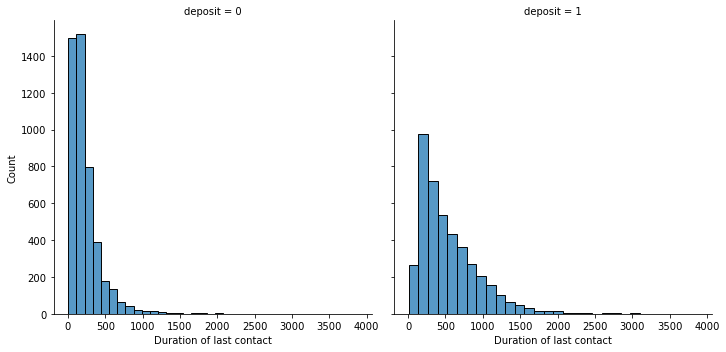

In [32]:
# visualise distribution of duration

duration_plot = sns.FacetGrid(train_set, col = 'deposit', height = 5)
duration_plot.map(sns.histplot, 'duration', bins = 30)
duration_plot.set_axis_labels('Duration of last contact', 'Count')

#### Clients with a longer duration of contact generally emded up subscribing for a term deposit.

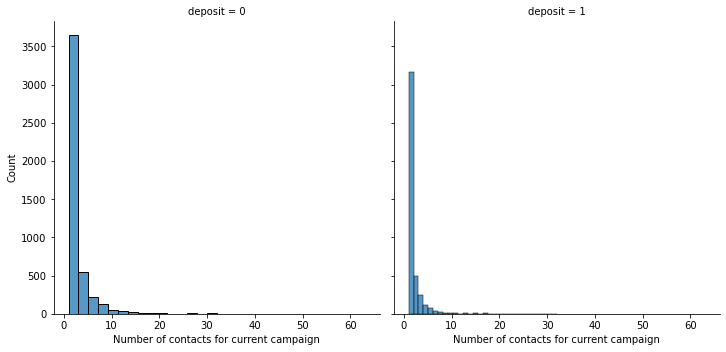

In [33]:
# visualise distribution of contacts

contacts_plot = sns.FacetGrid(train_set, col = 'deposit', height = 5)
contacts_plot.map(sns.histplot, 'current_contacts', bins = 30)
contacts_plot.set_axis_labels('Number of contacts for current campaign', 'Count')

#### Number of contacts did not seem to have a major impact in the term deposit subscription.

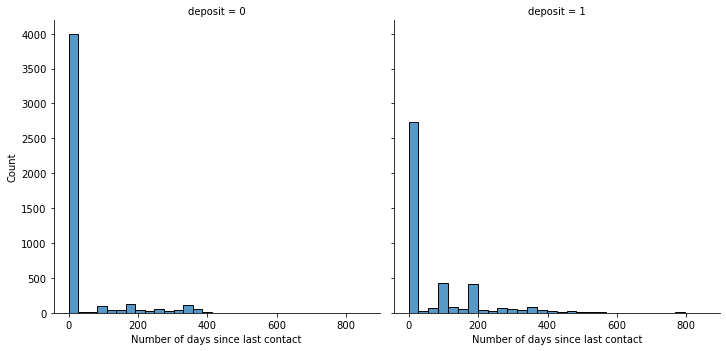

In [34]:
# visualise distribution of previous_days

prevD_plot = sns.FacetGrid(train_set, col = 'deposit', height = 5)
prevD_plot.map(sns.histplot, 'previous_days', bins = 30)
prevD_plot.set_axis_labels('Number of days since last contact', 'Count')

#### Over 3000 clients subscribed for a term deposit upon being contacted for the first time. Clients also tend to subscribe for a term deposit when being contacted after the 100-days or 200-days mark.

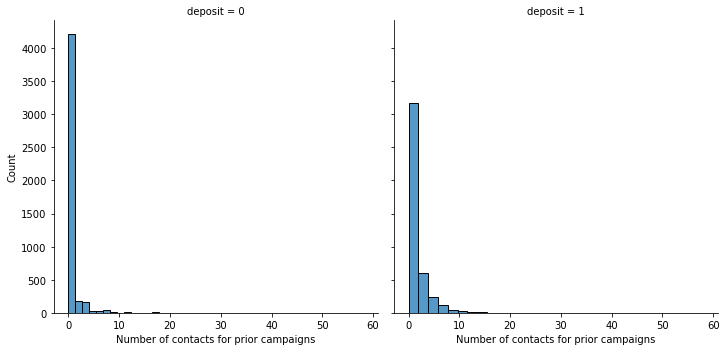

In [35]:
# visualise distribution of previous contacts

prevC_plot = sns.FacetGrid(train_set, col = 'deposit', height = 5)
prevC_plot.map(sns.histplot, 'previous_contacts', bins = 30)
prevC_plot.set_axis_labels('Number of contacts for prior campaigns', 'Count')

#### As opposed to the number fo contacts for current campaign, clients tend to subscribe for a term deposit if they wee contacted more frequently for prior campaigns.

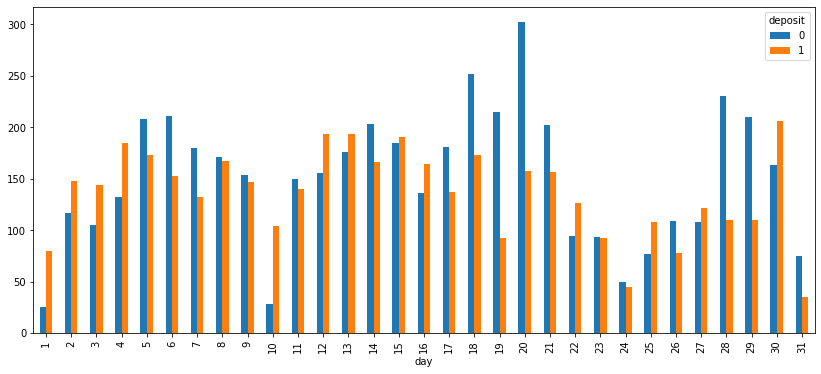

In [37]:
day = pd.crosstab(train_set['day'], train_set['deposit'])
day.plot(kind = 'bar', figsize = (14, 6))
plt.xticks(range(0,len(day.index)), day.index);

More clients subscribed for a term deposit when contacted on days 1 - 4, 10, 12, 13, 25 and 30. <br>
When contacted on days 5 - 7, 17 - 21 and 28 - 29, clients tend to not subscribe for a term deposit.

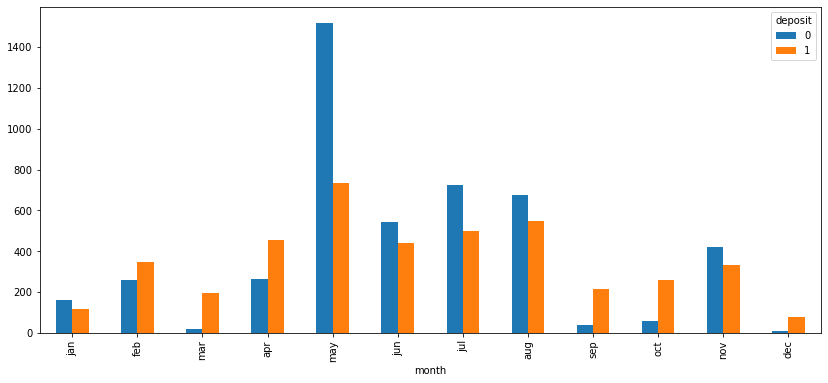

In [38]:
months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

month = pd.crosstab(train_set['month'], train_set['deposit']).reindex(months)
month.plot(kind = 'bar', figsize = (14, 6))
plt.xticks(range(0,len(month.index)), month.index);

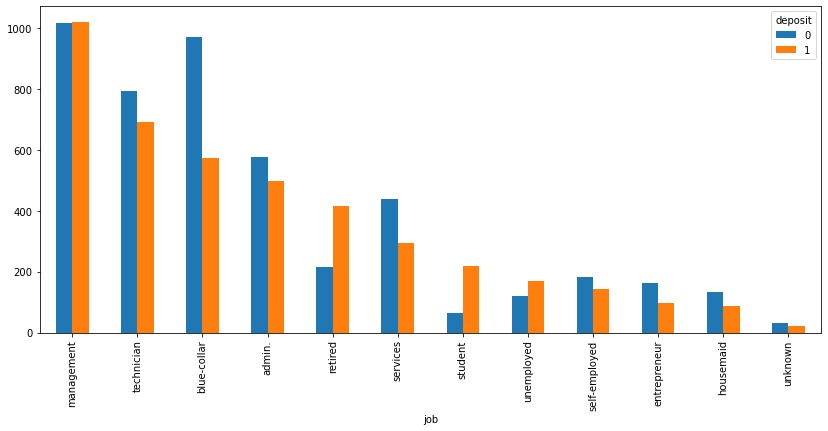

In [39]:
jobs = pd.crosstab(train_set['job'], train_set['deposit']).sort_values(by = [1, 0], ascending = False)
jobs.plot(kind = 'bar', figsize = (14, 6))
plt.xticks(range(0,len(jobs.index)), jobs.index);

<AxesSubplot:title={'center':'Has housing loan?'}, xlabel='housing'>

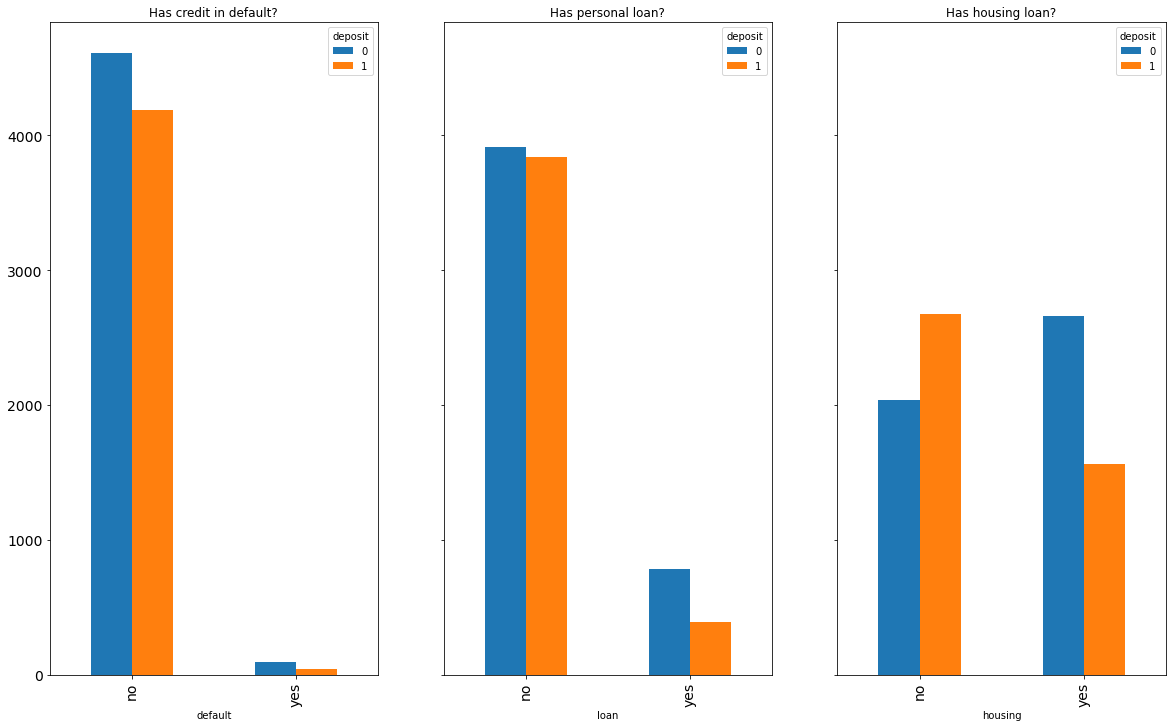

In [40]:
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(20, 12), sharey = True)
fig.subplots_adjust(hspace=.3)

default = pd.crosstab(train_set['default'], train_set['deposit']).sort_values(by = [1, 0], ascending = False)
default.plot(kind = 'bar', ax=axes[0], fontsize = 14, title = 'Has credit in default?')

loan = pd.crosstab(train_set['loan'], train_set['deposit']).sort_values(by = [1, 0], ascending = False)
loan.plot(kind = 'bar', ax = axes[1], fontsize = 14, title = 'Has personal loan?')

housing = pd.crosstab(train_set['housing'], train_set['deposit']).sort_values(by = [1, 0], ascending = False)
housing.plot(kind = 'bar', ax = axes[2], fontsize = 14, title = 'Has housing loan?')

<AxesSubplot:title={'center':'Mode of contact'}, xlabel='contact_mode'>

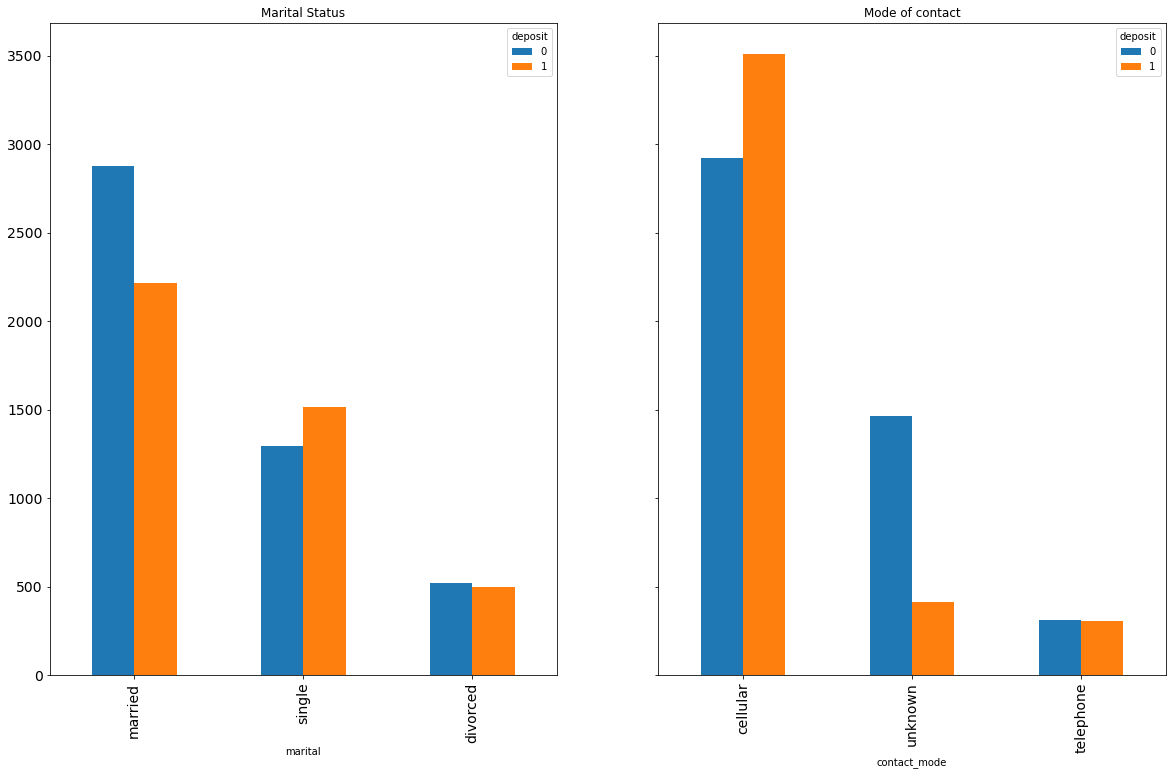

In [41]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(20, 12), sharey = True)
fig.subplots_adjust(hspace=.3)

marital = pd.crosstab(train_set['marital'], train_set['deposit']).sort_values(by = [1, 0], ascending = False)
marital.plot(kind = 'bar', ax=axes[0], fontsize = 14, title = 'Marital Status')

contact = pd.crosstab(train_set['contact_mode'], train_set['deposit']).sort_values(by = [1, 0], ascending = False)
contact.plot(kind = 'bar', ax=axes[1], fontsize = 14, title = 'Mode of contact')

<AxesSubplot:title={'center':'Outcome of previous campaign'}, xlabel='previous_outcome'>

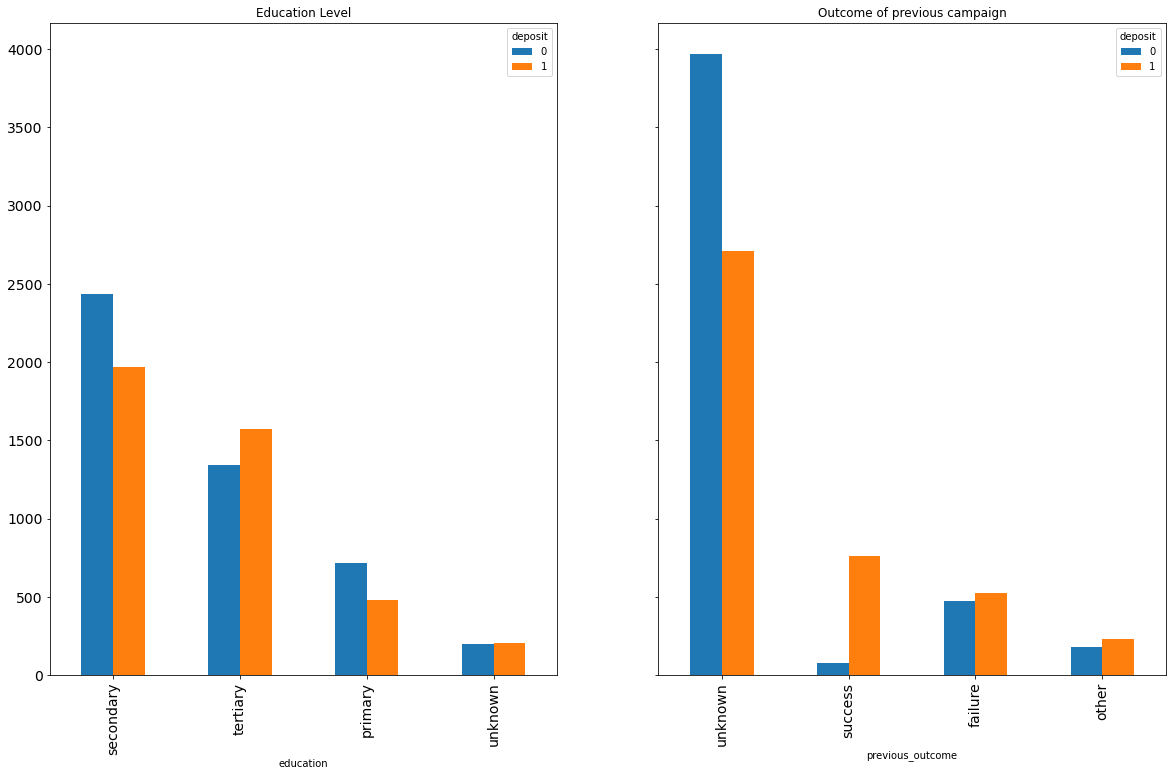

In [42]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(20, 12), sharey = True)
fig.subplots_adjust(hspace=.3)

education = pd.crosstab(train_set['education'], train_set['deposit']).sort_values(by = [1, 0], ascending = False)
education.plot(kind = 'bar', ax=axes[0], fontsize = 14, title = 'Education Level')

previous_outcome = pd.crosstab(train_set['previous_outcome'], train_set['deposit']).sort_values(by = [1, 0], ascending = False)
previous_outcome.plot(kind = 'bar', ax=axes[1], fontsize = 14, title = 'Outcome of previous campaign')

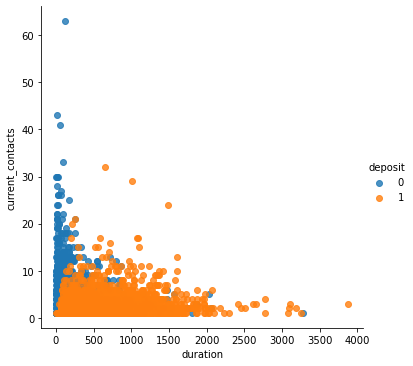

In [43]:
sns.lmplot(x='duration', y='current_contacts', data=train_set,
           fit_reg=False, # No regression line
           hue='deposit')   # Color by evolution stage

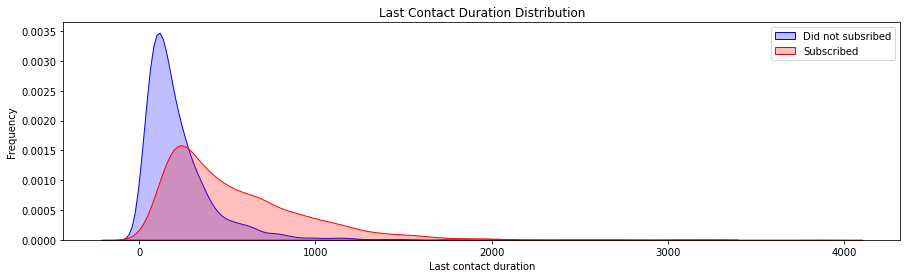

In [55]:
#KDEPlot: Kernel Density Estimate Plot
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(train_set.loc[(train_set['deposit'] == 0),'duration'] , color='b',shade=True, label='Did not subsribed')
ax=sns.kdeplot(train_set.loc[(train_set['deposit'] == 1),'duration'] , color='r',shade=True, label='Subscribed')
ax.set(xlabel='Last contact duration', ylabel='Frequency')
plt.title('Last Contact Duration Distribution')
plt.legend()

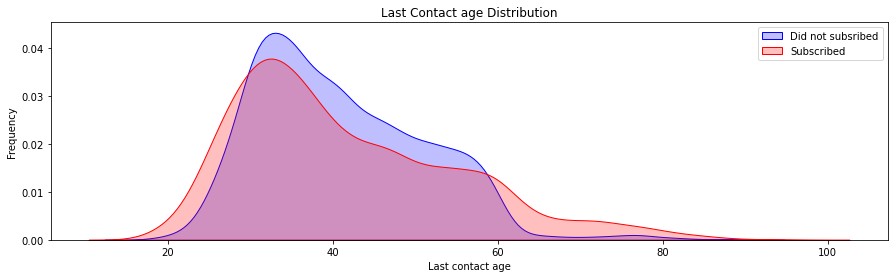

In [56]:
#KDEPlot: Kernel Density Estimate Plot
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(train_set.loc[(train_set['deposit'] == 0),'age'] , color='b',shade=True, label='Did not subsribed')
ax=sns.kdeplot(train_set.loc[(train_set['deposit'] == 1),'age'] , color='r',shade=True, label='Subscribed')
ax.set(xlabel='Last contact age', ylabel='Frequency')
plt.title('Last Contact age Distribution')
plt.legend()

### Data Pre-processing

In [ ]:
cat_var = ['job', 'default', 'loan', 'housing', 'marital', 'contact_mode', 'education', 'previous_outcome']

full_dataset = pd.get_dummies(full_dataset, columns = cat_var)

In [ ]:
full_dataset.shape

In [ ]:
full_dataset['month'].value_counts()

In [ ]:
# change values of deposit to 0 (did not subscribe) and 1 (subscribed)

month_dict = {
              'jan' : 1, 'feb' : 2, 'mar' : 3,
              'apr' : 4, 'may' : 5, 'jun' : 6,
              'jul' : 7, 'aug' : 8, 'sep' : 9,
              'oct' : 10, 'nov' : 11, 'dec' : 12
             }

full_dataset = full_dataset.replace({'month' : month_dict})

In [ ]:
full_dataset['month'].value_counts()

Since, months is a year and days in a month are cyclical, doing label encoding would not be the best representation (e.g. January and December are close to each other and not far). <br>
Performing one-hot encoding would result in multiple additional features which would not be as useful for the model.

We would map each cyclical variable onto a circle such that the lowest value for that variable appears right next to the largest value. We compute the x- and y- component of that point using sin and cos trigonometric functions. For more information, click [here](http://blog.davidkaleko.com/feature-engineering-cyclical-features.html).

In [ ]:
full_dataset['day_sin'] = np.sin(full_dataset.day*(2.*np.pi/24))
full_dataset['day_cos'] = np.cos(full_dataset.day*(2.*np.pi/24))
full_dataset['month_sin'] = np.sin((full_dataset.month-1)*(2.*np.pi/12))
full_dataset['month_cos'] = np.cos((full_dataset.month-1)*(2.*np.pi/12))

full_dataset.drop(columns = ['day', 'month'], inplace = True)
full_dataset.head()

In [ ]:
target = full_dataset.pop('deposit')
full_dataset = pd.concat([full_dataset, target], axis = 1)

In [ ]:
full_dataset.shape

In [ ]:
full_dataset.head()

In [ ]:
from sklearn.model_selection import train_test_split

features = full_dataset.iloc[:,0:-1]
target = full_dataset.iloc[:,-1]

features_train, features_test, target_train, target_test = train_test_split(features, 
                                                                            target, 
                                                                            test_size=0.20, 
                                                                            random_state=123, 
                                                                            stratify = target)

### Create Baseline Model with Logistic Regression

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

log_reg = LogisticRegression(solver = 'liblinear')

log_reg = log_reg.fit(features_train, target_train)

print ("\n\n ---Logistic Regression Model---")
log_reg_auc = roc_auc_score(target_test, log_reg.predict(features_test))

print ("Logistic Regression AUC = %2.3f" % log_reg_auc)

print(classification_report(target_test, log_reg.predict(features_test)))

### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# apply 5-fold cross validation

rf = RandomForestClassifier()

rf_result = cross_val_score(rf, features_train, target_train, cv = 5, scoring = 'f1')
rf_result.mean()

In [ ]:
rf = rf.fit(features_train, target_train)

print("\n\n ---Random Forest Model---")
rf_roc_auc = roc_auc_score(target_test, rf.predict(features_test))

print("Random Forest AUC = %2.3f" % rf_roc_auc)

print(classification_report(target_test, rf.predict(features_test)))

### Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()

gbc = gbc.fit(features_train, target_train)

gbc

In [ ]:
# apply 5-fold cross validation

gbc_result = cross_val_score(gbc, features_train, target_train, cv = 5, scoring = 'f1')
gbc_result.mean()

In [ ]:
gbc = gbc.fit(features_train, target_train)

print("\n\n ---Random Forest Model---")
gbc_roc_auc = roc_auc_score(target_test, gbc.predict(features_test))

print("Random Forest AUC = %2.3f" % gbc_roc_auc)

print(classification_report(target_test, gbc.predict(features_test)))

In [ ]:
rf.predict_proba(features_test)

### Receiver Operating Characteristic (ROC) Curve

In [ ]:
from sklearn.metrics import roc_curve

log_reg_fpr, log_reg_tpr, thresholds = roc_curve(target_test, log_reg.predict_proba(features_test)[:,1])
rf_fpr, rf_tpr, thresholds = roc_curve(target_test, rf.predict_proba(features_test)[:,1])
gbc_fpr, gbc_tpr, thresholds = roc_curve(target_test, gbc.predict_proba(features_test)[:,1])

plt.figure(figsize = (14, 6))

# Plot Logistic Regression ROC
plt.plot(log_reg_fpr, log_reg_tpr, label='Logistic Regression (area = %0.2f)' % log_reg_auc)

# Plot Random Forest ROC
plt.plot(rf_fpr, rf_tpr, label = 'Random Forest Classifier (area = %0.2f)' % rf_roc_auc)

# Plot Decision Tree ROC
plt.plot(gbc_fpr, gbc_tpr, label = 'Gradient Boosting Classifier (area = %0.2f)' % gbc_roc_auc)

# Plot Base Rate ROC
plt.plot([0,1], [0,1], 'k--', label = 'Base Rate')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()

### Hyparameter Tuning Random Forest

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 5)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 100, num = 5)]

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

In [ ]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, 
                               n_iter = 50, cv = 5, verbose = 2, random_state = 42, n_jobs = -1)

# Fit the random search model
rf_random.fit(features_train, target_train)

In [ ]:
rf_random.best_params_

In [ ]:
rf_random = rf_random.best_estimator_

print("\n\n ---Random Forest Model---")
rf_random_roc_auc = roc_auc_score(target_test, rf_random.predict(features_test))

print("Random Forest AUC = %2.3f" % rf_random_roc_auc)

print(classification_report(target_test, rf_random.predict(features_test)))